<h1 align=center>数据科学引论 - Python之道 </h1>

<h1 align=center>第9课 机器学习</h1>
<h1 align=center>分类与聚类</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h2>目录</h2>  
<font size = 3>
1. <a href="#ref0">将菜谱数据导入Python</a>  
2. <a href="#ref1">了解数据 & 数据准备</a>  
3. <a href="#ref2">哪几种烹饪方法是最相似的? (k-means聚类)</a>  
4. <a href="#ref3">我们能否根据食材来预测烹饪? (决策树)</a>  
5. <a href="#ref4">模型评估</a>  
 
</font>
<br>
<p></p>
</div>

# <center> 1. 将菜谱数据导入Python</center>

#### 轮到你了:

将数据导入python:

> `recipes = pd.read_csv('recipes.csv')`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import misc
from pylab import rcParams
%matplotlib inline
plt.style.use('ggplot')
#linux !wget  -O recipes.csv https://ibm.box.com/shared/static/5wah9atr5o1akuuavl2z9tkjzdinr1lv.csv 
recipes = pd.read_csv('resources/data/recipes.csv')
print ("Done")


Bad key "text.kerning_factor" on line 4 in
/Users/chenhaopeng/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Done


<hr><a id="ref1"></a>

<h1 align = center> 2. 了解数据 & 数据准备 </h1>


### 显示前几行

In [2]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [3]:
recipes[recipes['jasmine_tea']=='Yes']

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
12643,Asian,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
26642,American,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


#### 总共有多少列，多少行?
(rows, columns)

In [4]:
recipes.shape

(57691, 384)

In [5]:
recipes.columns

Index(['country', 'almond', 'angelica', 'anise', 'anise_seed', 'apple',
       'apple_brandy', 'apricot', 'armagnac', 'artemisia',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=384)

<br>
#### 哪个国家菜谱数量最多?
首先我们还是先要看下数据是否需要清洗。

In [6]:
#frequency table
recipes['country'].value_counts()

American        40150
Mexico           1754
Italian          1715
Italy            1461
Asian            1176
                ...  
Indonesia          12
East-African       11
Belgium            11
Israel              9
Bangladesh          4
Name: country, Length: 69, dtype: int64

### 问题: 国家名不一致 (大小写与别名)

**目标:**
- 把所有名字变成小写
- 使国家名一致

把所有名字变成小写:

In [7]:
recipes['country'] = recipes['country'].str.lower()

使国家名一致:

In [8]:
recipes.replace(to_replace = "china", value = "chinese", inplace=True)
recipes.replace(to_replace = "france", value = "french", inplace=True)
recipes.replace(to_replace = "germany", value = "german", inplace=True)
recipes.replace(to_replace = "india", value = "indian", inplace=True)
recipes.replace(to_replace = "israel", value = "jewish", inplace=True)
recipes.replace(to_replace = "italy", value = "italian", inplace=True)
recipes.replace(to_replace = "japan", value = "japanese", inplace=True)
recipes.replace(to_replace = "korea", value = "korean", inplace=True)
recipes.replace(to_replace = "mexico", value = "mexican", inplace=True)
recipes.replace(to_replace = "scandinavia", value = "scandinavian", inplace=True)
recipes.replace(to_replace = "thailand", value = "thai", inplace=True)
recipes.replace(to_replace = "vietnam", value = "vietnamese", inplace=True)

重新观察数据:

In [9]:
#frequency table
recipes['country'].value_counts()

american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canada                       774
indian                       598
western                      450
chinese                      442
southern_soulfood            346
jewish                       329
japanese                     320
spanish_portuguese           291
mediterranean                289
german                       289
thai                         289
uk-and-ireland               282
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
cajun_creole                 146
easterneuropean_russian      146
moroccan                     137
african                      115
southweste

### 问题: 某些国家的菜谱极少
删除这些菜谱数量少于50的国家。

In [10]:
before =recipes.shape[0] #number of rows of original df
HighReceipesCountries=recipes['country'].value_counts()>50
recipes = (recipes[
        recipes['country'].isin(
            HighReceipesCountries[HighReceipesCountries].index.tolist()
        )
    ])
after=recipes.shape[0];
#python2 print before - after, "rows removed."

print (before - after, "rows removed.")
recipes['country'].value_counts()

338 rows removed.


american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canada                       774
indian                       598
western                      450
chinese                      442
southern_soulfood            346
jewish                       329
japanese                     320
spanish_portuguese           291
german                       289
mediterranean                289
thai                         289
uk-and-ireland               282
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
cajun_creole                 146
easterneuropean_russian      146
moroccan                     137
african                      115
southweste

In [11]:
HighReceipesCountries.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

### 问题: 如果有一种食物含有大米（rice）、酱油（soy_sauce）、芥末（wasabi）和海藻（seaweed），我们能不能说它就是日本的食物？ 

In [12]:
recipes[(recipes['rice' ]== "Yes" ) &
   (recipes['soy_sauce']=="Yes") & 
   (recipes['wasabi']== "Yes") &
   (recipes['seaweed']=="Yes")]

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
11306,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
11321,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Yes,No,No,No,No,No
11361,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
12171,asian,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Yes,No,No,No,No,No
12385,asian,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13010,asian,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13159,asian,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13513,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13586,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13625,east_asian,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


 <br> 
### 问题: 哪些食材是最常见的?哪些最不常见?

**目的:**
- 统计所有菜谱的食材

In [13]:
CountIngredients=(recipes=='Yes').sum()
CountIngredients.sort_values(ascending=False)

egg                 21007
wheat               20766
butter              20703
onion               18057
garlic              17332
                    ...  
lilac_flower_oil        1
mate                    1
durian                  0
pimenta                 0
country                 0
Length: 384, dtype: int64

In [14]:
(recipes=='Yes').head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
np.array([True, True, True]).sum()

3

## 上述问题都是针对所有食谱的，那么每个国家使用食材的情况如何呢？

<hr>

### 问题: 不同国家的食材分布情况有何不同?

每个国家的“概况”是什么??  
- 中国人通常用什么食材?  
- 到底什么是“加拿大食物”?  

**目标:**
- 统计每个国家的每种食材数量，然后根据该国家的菜谱数进行归一化
    - 在结果数据集中，每个国家占一行，每种食材占一列
    - 对于每个国家每种食材，展示含有某种食材的菜谱的占比
    - 把结果导出到一个新的数据集
    - 找到每个国家最喜欢使用的食材

In [16]:
(recipes=='Yes').head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
by_country_aggr=(recipes=='Yes').groupby(recipes['country']).sum()
by_country_normalized = by_country_aggr.div(by_country_aggr.sum(axis=1), axis=0)
by_country_normalized.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
country,,,,,,,,,,,,,,,,,,,,,
african,0.0,0.014754,0.000000,0.000000,0.000000,0.003279,0.000000,0.006557,0.000000,0.0,...,0.000000,0.000820,0.004098,0.000820,0.001639,0.000000,0.000820,0.001639,0.000000,0.003279
american,0.0,0.005118,0.000003,0.000380,0.000072,0.006562,0.000078,0.001425,0.000013,0.0,...,0.000374,0.000867,0.003884,0.001868,0.001388,0.000085,0.000182,0.008600,0.002132,0.002349
asian,0.0,0.000760,0.000000,0.000084,0.000253,0.001267,0.000000,0.000507,0.000000,0.0,...,0.000084,0.000169,0.003884,0.000169,0.012581,0.000000,0.000169,0.000422,0.001098,0.001182
cajun_creole,0.0,0.000000,0.000000,0.000000,0.000000,0.000583,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000583,0.006997,0.000000,0.016327,0.000000,0.000583,0.002915,0.000583,0.000000
canada,0.0,0.004497,0.000000,0.000000,0.000000,0.004497,0.000000,0.000321,0.000000,0.0,...,0.000321,0.000482,0.003694,0.002570,0.000482,0.000000,0.000161,0.008352,0.002409,0.001446


### 什么是中国菜?

In [18]:
by_country_normalized.loc['chinese'].sort_values( ascending=False)
#by_country_norm.ix['canada',:].sort_values( ascending=False)


soy_sauce        0.069005
ginger           0.053746
garlic           0.053291
scallion         0.048508
sesame_oil       0.039854
                   ...   
marjoram         0.000000
mandarin_peel    0.000000
macadamia_nut    0.000000
lovage           0.000000
country          0.000000
Name: chinese, Length: 384, dtype: float64

In [25]:
#Try for different  regions 
NameofRegion=by_country_normalized.index
NameofRegion

Index(['african', 'american', 'asian', 'cajun_creole', 'canada', 'caribbean',
       'central_southamerican', 'chinese', 'east_asian', 'eastern-europe',
       'easterneuropean_russian', 'english_scottish', 'french', 'german',
       'greek', 'indian', 'irish', 'italian', 'japanese', 'jewish', 'korean',
       'mediterranean', 'mexican', 'middleeastern', 'moroccan',
       'north-african', 'scandinavian', 'south-america', 'southern_soulfood',
       'southwestern', 'spain', 'spanish_portuguese', 'thai', 'uk-and-ireland',
       'vietnamese', 'western'],
      dtype='object', name='country')

### 问题: 在每个国家，最受欢迎的五种食材是什么呢?

**目标:**
- 对每个国家，获取最常见的5种食材

<br>

In [27]:
for Region in NameofRegion:
#python2     print Region
#python2     print by_country_normalized.loc[Region].sort_values( ascending=False).ix[0:5] 
#python2     print "\n"
    print (Region)
    print (by_country_normalized.loc[Region].sort_values( ascending=False).iloc[0:5]) 
    print ("\n")

african
onion        0.050000
olive_oil    0.049180
garlic       0.046721
cumin        0.040164
cayenne      0.033607
Name: african, dtype: float64


american
butter    0.051884
egg       0.051071
wheat     0.050223
onion     0.036977
milk      0.033532
Name: american, dtype: float64


asian
soy_sauce    0.049987
ginger       0.048974
garlic       0.048299
rice         0.041628
scallion     0.038504
Name: asian, dtype: float64


cajun_creole
onion          0.059475
cayenne        0.047813
garlic         0.041399
butter         0.030904
bell_pepper    0.029155
Name: cajun_creole, dtype: float64


canada
wheat     0.049149
butter    0.047382
egg       0.044009
onion     0.042724
garlic    0.033569
Name: canada, dtype: float64


caribbean
onion            0.055819
garlic           0.055226
black_pepper     0.033848
vegetable_oil    0.033848
tomato           0.032660
Name: caribbean, dtype: float64


central_southamerican
garlic     0.062729
onion      0.059982
cayenne    0.057234
tomato  

<hr><a id="ref2"></a>

# <center>3. 哪些烹饪方法是最相似的? (K-means聚类)</center>

从sklearn加载k-means聚类库

In [28]:
from sklearn.cluster import KMeans

设置簇的个数:

In [29]:
n_cluster = 5

运行聚类:

In [30]:
y_pred = KMeans(n_clusters = n_cluster, random_state=0).fit_predict(by_country_normalized)

## 展示聚类结果 

In [31]:
for i in range(0,n_cluster):
    print ("Cluster number "+str(i) +"----------------------------------------------------------------------------")
    print (list(by_country_normalized[y_pred==i].index))
    print ("")

Cluster number 0----------------------------------------------------------------------------
['greek', 'italian', 'mediterranean', 'spain', 'spanish_portuguese']

Cluster number 1----------------------------------------------------------------------------
['cajun_creole', 'caribbean', 'central_southamerican', 'mexican', 'southwestern']

Cluster number 2----------------------------------------------------------------------------
['american', 'canada', 'eastern-europe', 'easterneuropean_russian', 'english_scottish', 'french', 'german', 'irish', 'jewish', 'scandinavian', 'southern_soulfood', 'uk-and-ireland', 'western']

Cluster number 3----------------------------------------------------------------------------
['asian', 'chinese', 'east_asian', 'japanese', 'korean', 'thai', 'vietnamese']

Cluster number 4----------------------------------------------------------------------------
['african', 'indian', 'middleeastern', 'moroccan', 'north-african', 'south-america']



<hr>

# <center> 4. 我们能否根据食材来预测烹饪类型? (决策树)</center>

**总体目标:**
- 创建一个决策树模型基于食材预测烹饪类型（国家）

<br>
**目标:**
- 加载与决策树相关的库 
- 训练所有食谱得到一棵决策树


In [32]:
#import sklearn.cross_validation as cv
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

###  将所有列转换为数字 ，将No转换为0，Yes转换为1

In [33]:
recipes.replace(to_replace='No', value=0, inplace=True)
recipes.replace(to_replace='Yes', value=1, inplace=True)

In [34]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


查看前五行数据中rice列的数据

In [35]:
recipes.loc[0:5]["rice"]

0    1
1    0
2    0
3    1
4    1
5    1
Name: rice, dtype: int64

### 获取每个样本的分类

In [36]:
y = recipes['country']
y[0:10]

0    vietnamese
1    vietnamese
2    vietnamese
3    vietnamese
4    vietnamese
5    vietnamese
6    vietnamese
7    vietnamese
8    vietnamese
9    vietnamese
Name: country, dtype: object

### 获取每个样本的特征

In [37]:
X = recipes.iloc[:,1:]
X[0:10]

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br> 
**问题:**
- 决策树不够具体 

**目标:**
- 单独为东亚国家（韩国、日本、中国、泰国）和印度训练决策树 

#### 使用指定国家的数据来生成决策树模型，并且将结果赋值给变量bamboo_tree

选择东亚国家+印度

In [38]:
Newdata = recipes[recipes.country.isin(["korean","japanese","chinese","thai","indian"])]

选择每个样本的特征和分类

In [39]:
y=Newdata['country']
X=Newdata.iloc[:,1:]

创建并且训练分类树

In [40]:
bamboo_tree = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=100,min_samples_leaf=100)
bamboo_tree.fit(X, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100)

### 树的可视化

In [42]:
#! 管理员命令行 conda install pydotplus
# 同时在外部需要下载http://www.graphviz.org/pub/graphviz/stable/windows/graphviz-2.38.msi然后双击安装，这是一个画流程图的工具


from six import StringIO
import pydotplus
import matplotlib.image as mpimg

# 然后要在环境变量里添加这个工具的可执行目录，否则之后的代码会出现InvocationException: GraphViz's executables not found 错误
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

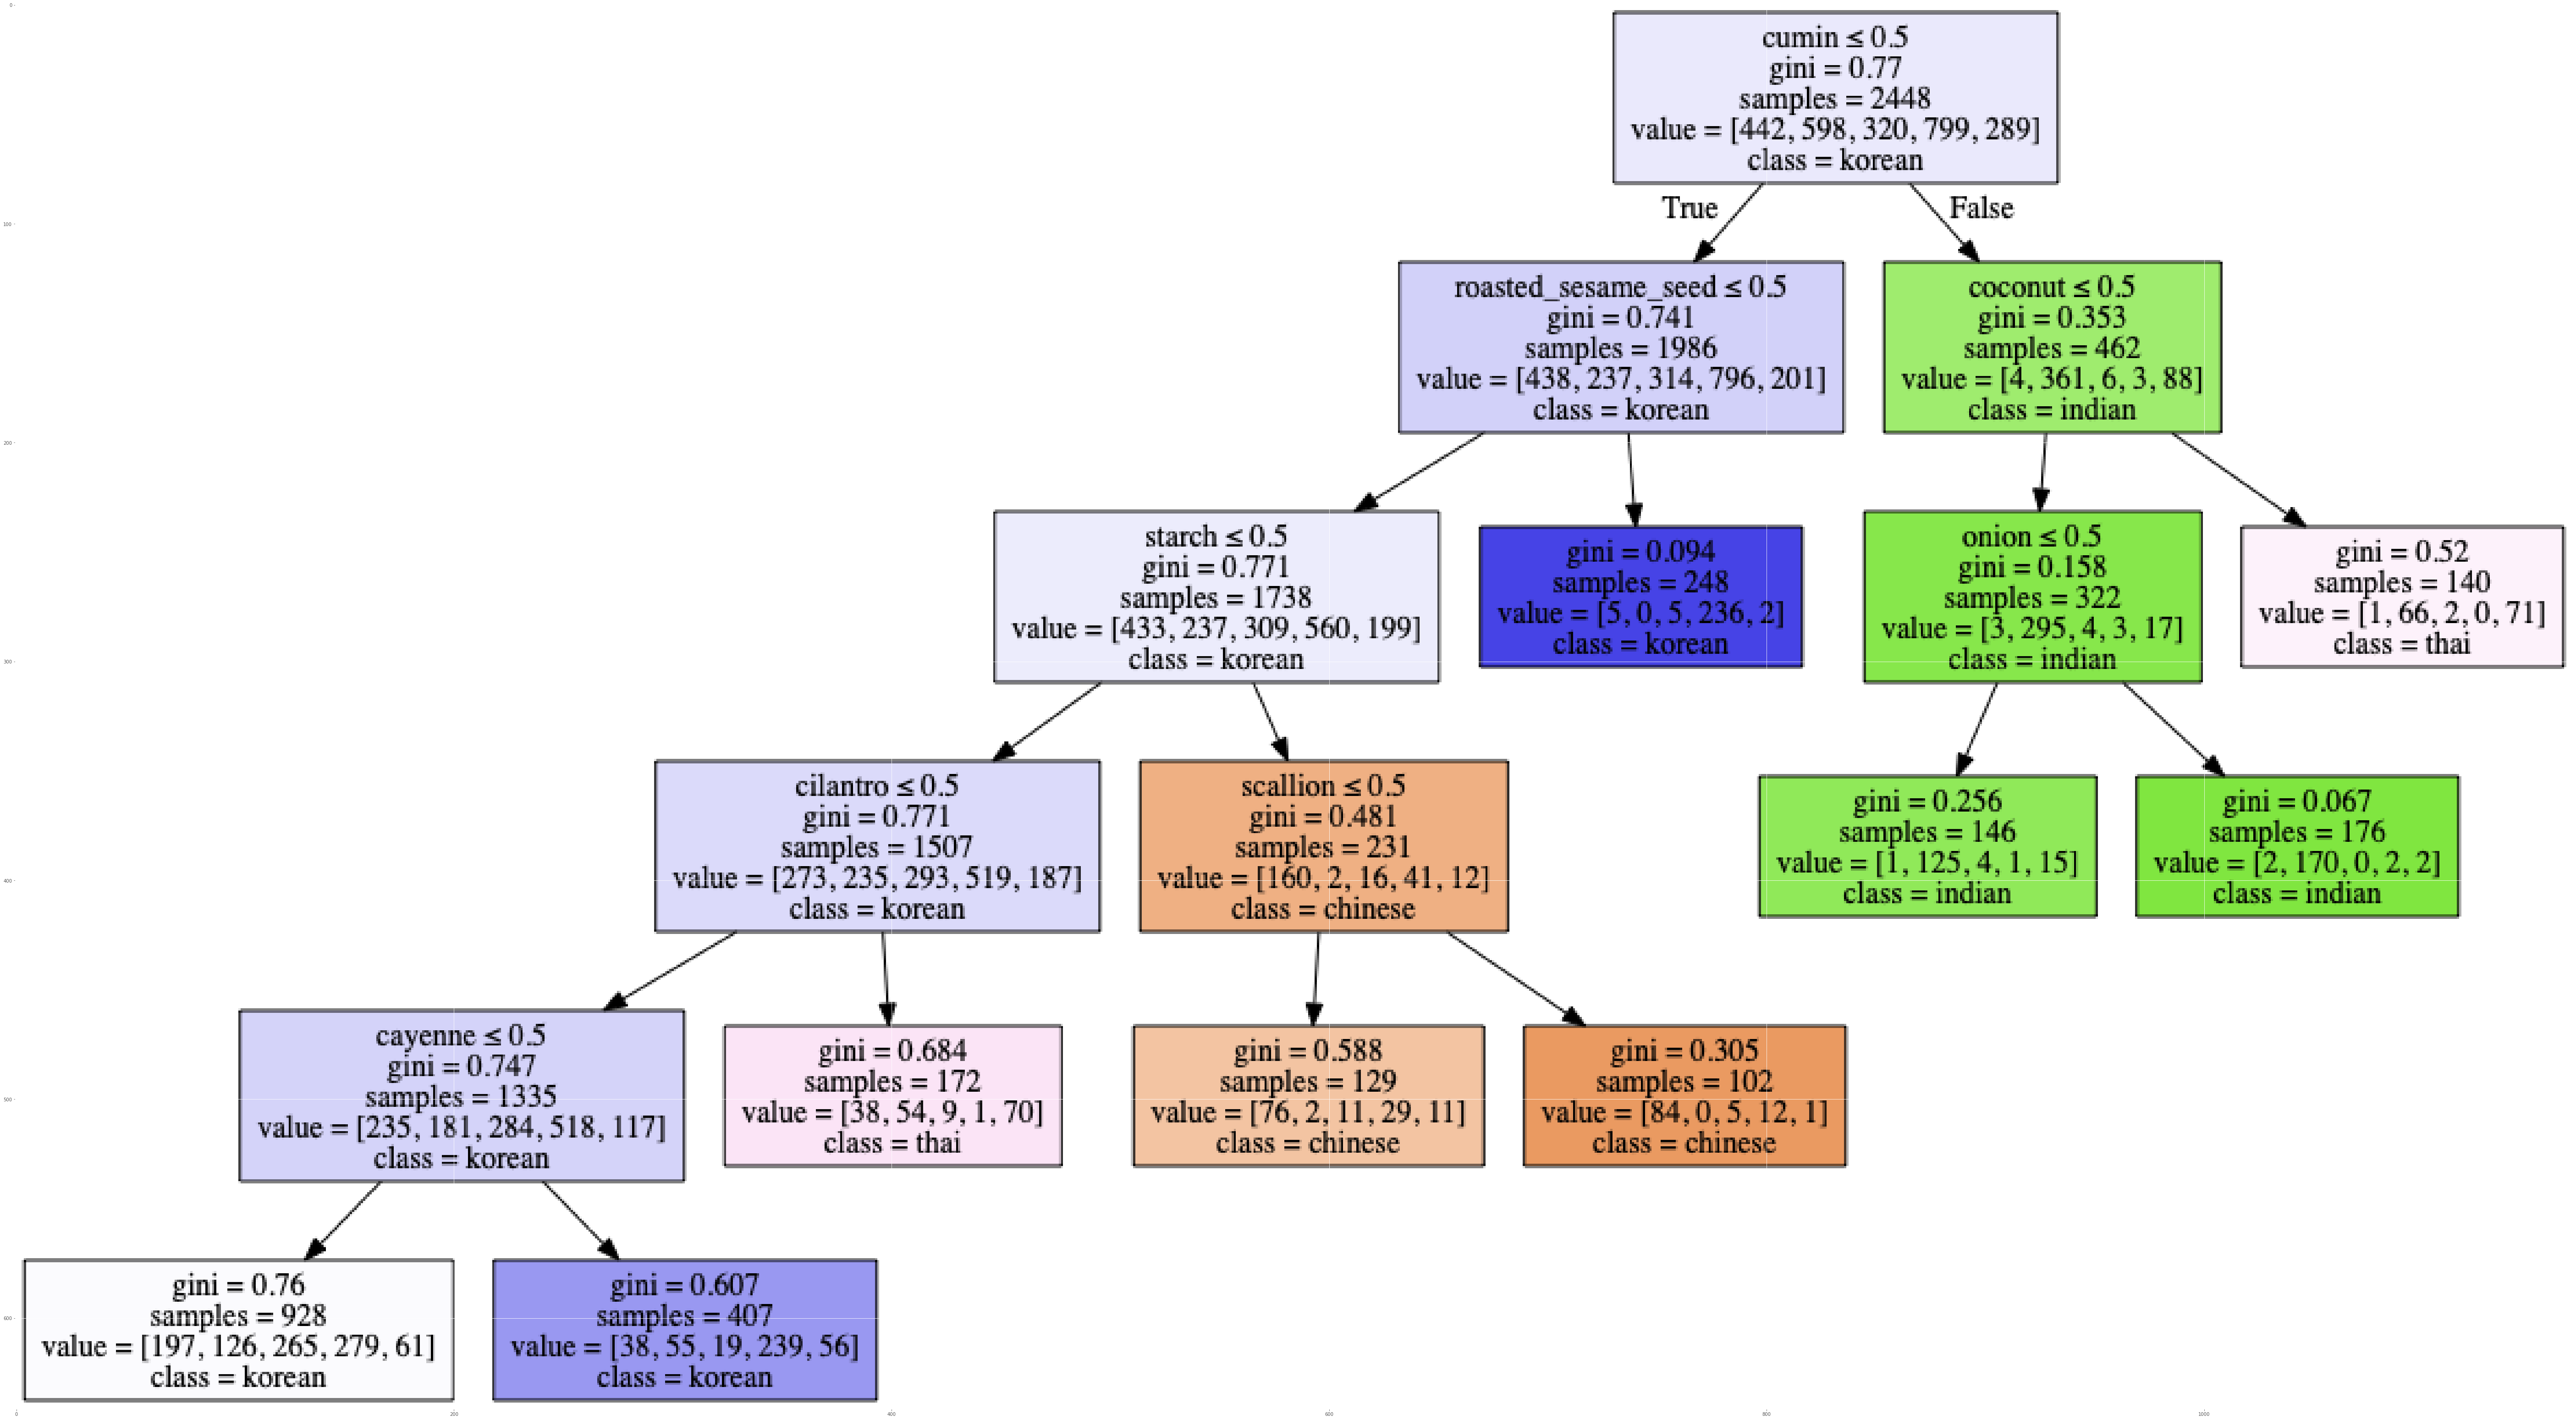

In [44]:
dot_data = StringIO()
filename = "bombootree.png"
Features = list(recipes.iloc[:,1:].columns.values)
out=tree.export_graphviz(bamboo_tree,feature_names=Features, out_file=dot_data,class_names=np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

执行一次预测并且得到决策树的准确率

In [45]:
y_pred=bamboo_tree.predict(X)
accuracy_score(y, y_pred)

0.5514705882352942

In [46]:
y_pred

array(['thai', 'korean', 'korean', ..., 'korean', 'korean', 'korean'],
      dtype=object)

In [47]:
? accuracy_score

# <center> 5. 模型评估</center>

**目标:**
- 将数据分成训练数据和测试数据两部分
- 在训练数据上训练模型
- 使用不含国家标签的测试数据去检测模型的预测结果

**将数据集限制在 东亚国家和印度**
把新的数据集赋值给`bamboo`:

In [48]:
bamboo=recipes[recipes.country.isin(["korean","japanese","chinese","thai","indian"])]

In [49]:
bamboo.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### 每一个烹饪法（国家）都有多少种食谱?

In [50]:
bamboo['country'].value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: country, dtype: int64

#### 接下来，让我们从原始数据集(`bamboo`)中创建训练集和测试集

In [51]:
import random
random.seed(99)

testdf = pd.DataFrame()
traindf = pd.DataFrame()

msk = np.random.rand(len(bamboo)) < 0.7
Traindf = bamboo[msk]
Testdf = bamboo[~msk]

#### 确认每个烹饪法的食谱数量:

In [52]:
#Original dataset
bamboo['country'].value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: country, dtype: int64

In [53]:
#Training dataset 
Traindf['country'].value_counts()

korean      557
indian      395
chinese     313
japanese    226
thai        215
Name: country, dtype: int64

In [54]:
#Testing dataset 
Testdf['country'].value_counts()

korean      242
indian      203
chinese     129
japanese     94
thai         74
Name: country, dtype: int64

#### 从训练和测试数据中选择特征和分类

In [55]:
y_train=Traindf['country']
X_train=Traindf.iloc[:,1:]

y_test=Testdf['country']
X_test=Testdf.iloc[:,1:]

y_train

66         indian
67         indian
68         indian
69         indian
70         indian
           ...   
57686    japanese
57687    japanese
57688    japanese
57689    japanese
57690    japanese
Name: country, Length: 1706, dtype: object

#### 创建分类树并对分类树进行训练

In [56]:
bamboo_tree = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=20,min_samples_leaf=100,)
bamboo_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=20)

### 用变量bamboo_tree在数据集bamboo_test上预测烹饪方法:

In [57]:
y_pred=bamboo_tree.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred)

0.532345013477089

### 创建一个混淆矩阵
- 将模型预测的结果和实际的烹饪标签进行比较

In [59]:
import matplotlib.ticker as ticker

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # I also added cmap=cmap here, to make use of the 
    # colormap you specify in the function call
    cax = ax.matshow(cm,cmap=cmap)
    plt.title(title)
    fig.colorbar(cax)
    if labels:
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.xlabel('Predicted')
    plt.ylabel('True')

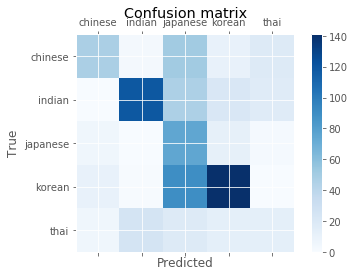

In [60]:
labels = ['chinese','indian','japanese','korean','thai']
cm = confusion_matrix( y_test,y_pred)
plot_confusion_matrix(cm, labels=labels)


In [61]:
cm

array([[ 47,   3,  51,  10,  18],
       [  0, 119,  46,  21,  17],
       [  5,   0,  75,  12,   2],
       [ 10,   1,  90, 141,   0],
       [  5,  25,  18,  13,  13]])

#### 表格解释:
- 每一行是实际菜谱的烹饪分类
- 从左上角到右下角的对角线显示了正确的预测
- 每个值都代表了国家X的食谱被正确地标记为国家X
- 例:148(60+3+65+11+9)个中国菜谱中有60个预测是正确的，预测结果为“中国”，另外30%的错误预测成了韩国，6.75预测成了日本。
#### 讨论:
- 哪些烹饪可能是错误分类的，哪些是正确分类的?
- 哪些烹饪方式容易被误认成其他烹饪方式?

<br>
<hr><a id="ref5"></a>

### 食谱之外

#### 现实生活中应用决策树的例子
- 客户流失
- 信用卡诈骗
- 癌症预测

#### 现实生活中运用聚类的例子
- 顾客区分
- 推荐引擎

<hr>

<hr>
**引用**  
食谱数据集来自: 
- [Ahn, Yong-Yeol, et al. "Flavor network and the principles of food pairing." Scientific reports 1 (2011).](http://yongyeol.com/papers/ahn-flavornet-2011.pdf)
- 关于食材的数据集也可以在这里找到:
  - **`recipes.csv`** (64.2 MB):  http://bit.ly/recipesdata